In [2]:
!pip install imblearn

In [3]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score,classification_report, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('./TravelInsurancePrediction.csv')
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes': 1, 'No': 0})

# df = df.drop(["GraduateOrNot"] , axis=1)
df_index = ['Age', 'AnnualIncome', 'ChronicDiseases',"GraduateOrNot", 
          'FrequentFlyer', 'FamilyMembers', 'Employment Type',
          'EverTravelledAbroad']
df_label_index = ['TravelInsurance']
ndf = df[['Age', 'AnnualIncome', 'ChronicDiseases', 'GraduateOrNot',
          'FrequentFlyer', 'FamilyMembers', 'Employment Type',
          'EverTravelledAbroad', 'TravelInsurance']]
X = ndf[list(ndf.columns)[:-1]]
y = ndf[list(ndf.columns)[-1]]
# y = y.astype({'TravelInsurance': int})
# X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTENC ,SMOTEN
from imblearn.combine import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

                #언더샘플링
sample_list = {'enn' : EditedNearestNeighbours(), 
               'rus' : RandomUnderSampler(random_state=0),
              'nm1' : NearMiss(version=1),
               'renn' : RepeatedEditedNearestNeighbours(),
              'allknn' : AllKNN(), 
               'cnn' : CondensedNearestNeighbour(random_state=0),
              'oss' : OneSidedSelection(random_state=0),
               'ncr' : NeighbourhoodCleaningRule(),
              'iht' : InstanceHardnessThreshold(random_state=0,estimator=LogisticRegression(solver='lbfgs', multi_class='auto')),
                #오버샘플링
               'smote_nc' :  SMOTENC(categorical_features=[0, 2], random_state=0),
               'smote' : SMOTEN(random_state=0),
                #언더 오버 조합
               'smote_enn' : SMOTEENN(random_state=0),
               'smote_tomek' : SMOTETomek(random_state=0)
              }

model_list = {'Decisiontree' : tree.DecisionTreeClassifier(criterion='entropy', max_depth=5),
             'BalancedBagging' : BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0),
             'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=100, random_state=0),
             'EasyEnsemble' : EasyEnsembleClassifier(random_state=0),
             'RandomForest': RandomForestClassifier(random_state=0),
             }

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    report = classification_report(y_test, pred)
    print('오차행렬')
    print()
    print(confusion)
    print()
    print('report')
    print()
    print(report)
    print()
    print('정리')
    print()
    print('정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}'.format(accuracy, precision, recall))



In [13]:
f1_list={}
    
for under in sample_list:
    X_resampled, y_resampled  = sample_list[under].fit_resample(X_train, y_train)
    for model in model_list:
        model_ = model_list[model]
        model_.fit(X_resampled, y_resampled)
        y_hat = model_.predict(X_test)
        
        print('샘플링 방법 : ',under)
        print()
        print(model,'모델')
        get_clf_eval(y_test, y_hat)
        
        f1=f1_score(y_test, y_hat,  average='macro')
        name=str(under)+" "+str(model_).split("(")[0]
        f1_list[name]=f1
        
print(f1_list)

샘플링 방법 :  enn

Decisiontree 모델
오차행렬

[[191  66]
 [ 46  95]]

report

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       257
           1       0.59      0.67      0.63       141

    accuracy                           0.72       398
   macro avg       0.70      0.71      0.70       398
weighted avg       0.73      0.72      0.72       398


정리

정확도 : 0.7186
정밀도 : 0.5901
재현율 : 0.6738
샘플링 방법 :  enn

BalancedBagging 모델
오차행렬

[[159  98]
 [ 40 101]]

report

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       257
           1       0.51      0.72      0.59       141

    accuracy                           0.65       398
   macro avg       0.65      0.67      0.65       398
weighted avg       0.70      0.65      0.66       398


정리

정확도 : 0.6533
정밀도 : 0.5075
재현율 : 0.7163
샘플링 방법 :  enn

BalancedRandomForest 모델
오차행렬

[[162  95]
 [ 37 104]]

report

              precision    recall  f1-sc

샘플링 방법 :  renn

RandomForest 모델
오차행렬

[[113 144]
 [ 28 113]]

report

              precision    recall  f1-score   support

           0       0.80      0.44      0.57       257
           1       0.44      0.80      0.57       141

    accuracy                           0.57       398
   macro avg       0.62      0.62      0.57       398
weighted avg       0.67      0.57      0.57       398


정리

정확도 : 0.5678
정밀도 : 0.4397
재현율 : 0.8014
샘플링 방법 :  allknn

Decisiontree 모델
오차행렬

[[233  24]
 [ 58  83]]

report

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       257
           1       0.78      0.59      0.67       141

    accuracy                           0.79       398
   macro avg       0.79      0.75      0.76       398
weighted avg       0.79      0.79      0.79       398


정리

정확도 : 0.7940
정밀도 : 0.7757
재현율 : 0.5887
샘플링 방법 :  allknn

BalancedBagging 모델
오차행렬

[[144 113]
 [ 31 110]]

report

              precision    recall  f1-sco

샘플링 방법 :  ncr

EasyEnsemble 모델
오차행렬

[[211  46]
 [ 47  94]]

report

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       257
           1       0.67      0.67      0.67       141

    accuracy                           0.77       398
   macro avg       0.74      0.74      0.74       398
weighted avg       0.77      0.77      0.77       398


정리

정확도 : 0.7663
정밀도 : 0.6714
재현율 : 0.6667
샘플링 방법 :  ncr

RandomForest 모델
오차행렬

[[182  75]
 [ 44  97]]

report

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       257
           1       0.56      0.69      0.62       141

    accuracy                           0.70       398
   macro avg       0.68      0.70      0.69       398
weighted avg       0.72      0.70      0.71       398


정리

정확도 : 0.7010
정밀도 : 0.5640
재현율 : 0.6879
샘플링 방법 :  iht

Decisiontree 모델
오차행렬

[[144 113]
 [ 34 107]]

report

              precision    recall  f1-score   suppo

샘플링 방법 :  smote_enn

BalancedRandomForest 모델
오차행렬

[[232  25]
 [ 58  83]]

report

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       257
           1       0.77      0.59      0.67       141

    accuracy                           0.79       398
   macro avg       0.78      0.75      0.76       398
weighted avg       0.79      0.79      0.78       398


정리

정확도 : 0.7915
정밀도 : 0.7685
재현율 : 0.5887
샘플링 방법 :  smote_enn

EasyEnsemble 모델
오차행렬

[[241  16]
 [ 58  83]]

report

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       257
           1       0.84      0.59      0.69       141

    accuracy                           0.81       398
   macro avg       0.82      0.76      0.78       398
weighted avg       0.82      0.81      0.80       398


정리

정확도 : 0.8141
정밀도 : 0.8384
재현율 : 0.5887
샘플링 방법 :  smote_enn

RandomForest 모델
오차행렬

[[226  31]
 [ 58  83]]

report

              precision  

In [71]:
df_plot=pd.DataFrame(f1_list, index=[0])
df_plot=df_plot.transpose()

In [73]:
condition = df_plot[0].sort_values(ascending = False)
condition=condition.head(5)

In [74]:
condition=pd.DataFrame(condition)
condition

,0
smote_nc DecisionTreeClassifier,0.807884
oss DecisionTreeClassifier,0.801785
cnn DecisionTreeClassifier,0.793710
rus DecisionTreeClassifier,0.793165
nm1 DecisionTreeClassifier,0.785160


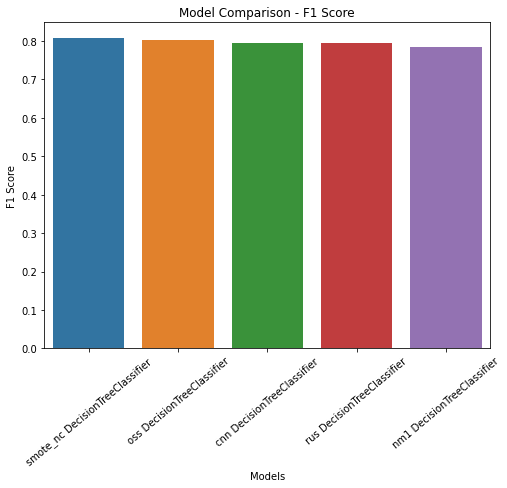

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns 

x=condition.index
y=condition[0]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y);
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.xticks(rotation=40)
plt.title("Model Comparison - F1 Score");